In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
flight = pd.read_excel('Data_Train.xlsx')
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
flight.shape

(10683, 11)

In [8]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
flight['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [10]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
flight.dropna(inplace=True)
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [13]:
flight['Journey_Day'] = pd.to_datetime(flight.Date_of_Journey , format = '%d/%m/%Y').dt.day
flight['Journey_Month'] = pd.to_datetime(flight.Date_of_Journey , format = '%d/%m/%Y').dt.month
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
flight['Dep_hour'] = pd.to_datetime(flight.Dep_Time ).dt.hour
flight['Dep_Minute'] = pd.to_datetime(flight.Dep_Time ).dt.minute
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [15]:
flight['Arrival_hour'] = pd.to_datetime(flight.Arrival_Time ).dt.hour
flight['Arrival_Minute'] = pd.to_datetime(flight.Arrival_Time ).dt.minute
flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [16]:
flight.drop(columns=['Dep_Time' , 'Date_of_Journey'],inplace=True)

In [17]:
flight.drop(columns='Arrival_Time',inplace=True)

In [18]:
flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [19]:
duration = list(flight.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

In [20]:
flight['Duration_Hour'] = duration_hour
flight['Duration_Minute'] = duration_minute

In [21]:
flight.drop(columns='Duration',inplace=True)

In [22]:
flight.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [23]:
flight['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

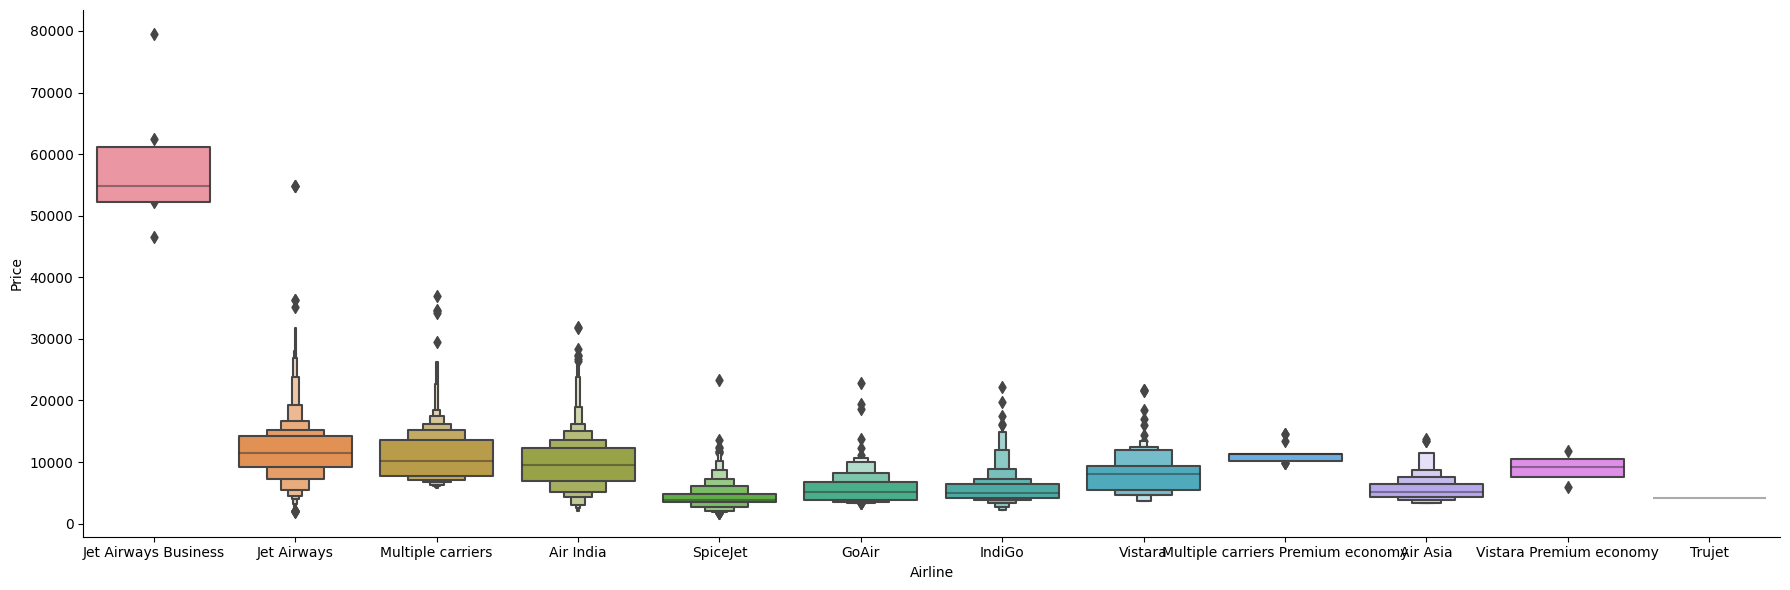

In [24]:
sns.catplot(y='Price' , x='Airline' , data = flight.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

In [25]:
Airline = flight['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [26]:
flight['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

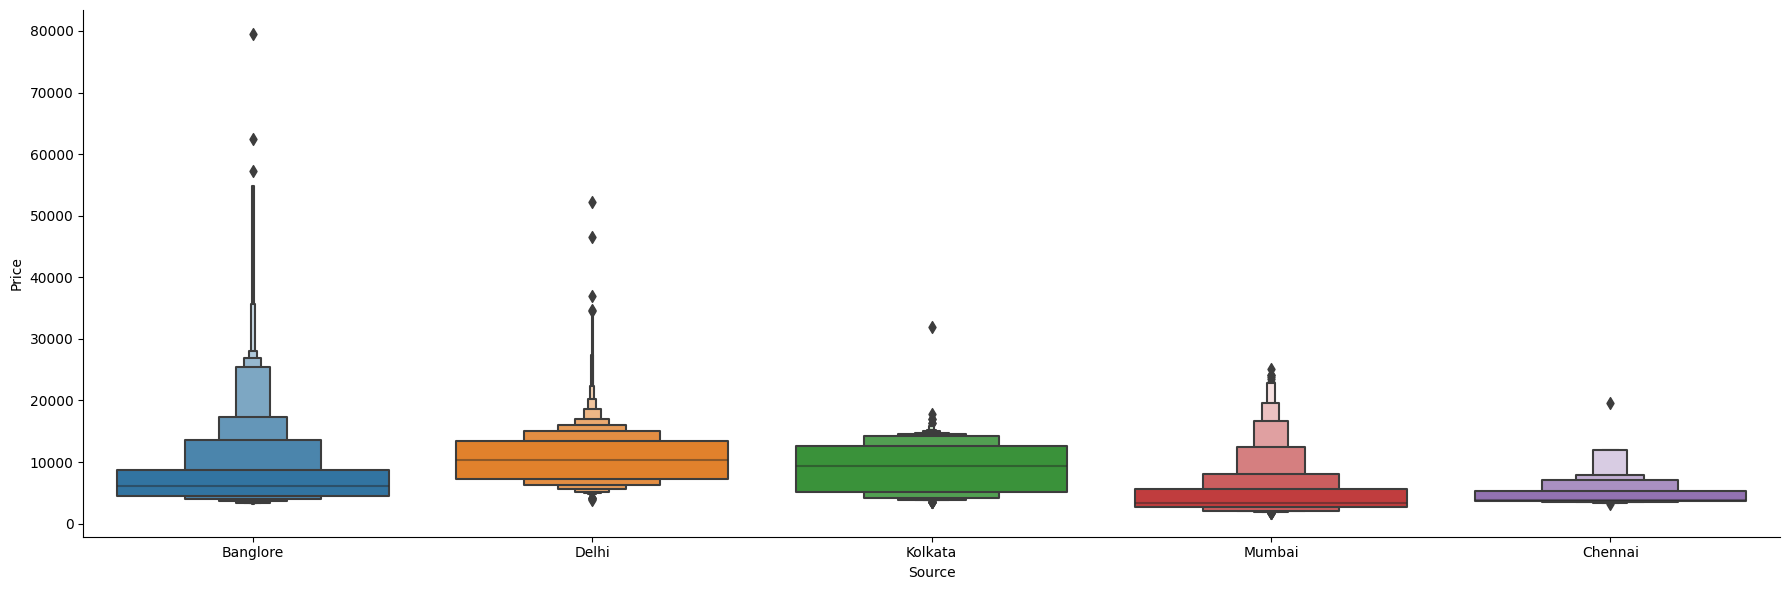

In [27]:
sns.catplot(y='Price' , x='Source' , data = flight.sort_values('Price',ascending=False) , kind='boxen' , height=6 , aspect=3)

In [28]:
flight['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [29]:
Source = flight[['Source']]

Source = pd.get_dummies(Source , drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [30]:
flight['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [31]:
Destination = flight[['Destination']]

Destination = pd.get_dummies(Destination , drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
flight['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [33]:
flight.drop(columns=['Route','Additional_Info'],axis=1 , inplace=True)

In [34]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [35]:
flight['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
flight.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

In [37]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [38]:
flight = pd.concat( [flight , Airline ,Source , Destination] , axis=1)

In [39]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [40]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [41]:
flight.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
flight.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)

In [43]:
flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
flight.shape

(10682, 30)

## Test Data

In [46]:
flight_test = pd.read_excel('Data_Test.xlsx')
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [48]:


print("-"*50)
print("Shape")
print(flight_test.shape)

print("-"*50)
print("Info")
print(flight_test.info())

print("-"*50)
print("Duration count values")
print(flight_test['Duration'].value_counts())

print("-"*50)
print("Check null value")
print(flight_test.isnull().sum())

print("-"*50)
print("Drop null value rows")
flight_test.dropna(inplace=True)

print("-"*50)
print("Check null values")
print(flight_test.isnull().sum())

print("-"*50)
print("Fetch journey day and month from Date_of_Journey")
flight_test['Journey_Day'] = pd.to_datetime(flight_test.Date_of_Journey , format = '%d/%m/%Y').dt.day
flight_test['Journey_Month'] = pd.to_datetime(flight_test.Date_of_Journey , format = '%d/%m/%Y').dt.month
print(flight_test.head())

print("-"*50)
print("Fetch Departure hours and minutes from Dep_Time")
flight_test['Dep_hour'] = pd.to_datetime(flight_test.Dep_Time ).dt.hour
flight_test['Dep_Minute'] = pd.to_datetime(flight_test.Dep_Time ).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Dep_time and Date_of_Journey columns")
flight_test.drop(columns=['Dep_Time' , 'Date_of_Journey'],inplace=True)

print("-"*50)
print("Fetch journey hours and minutes from Arrival_Time")
flight_test['Arrival_hour'] = pd.to_datetime(flight_test.Arrival_Time ).dt.hour
flight_test['Arrival_Minute'] = pd.to_datetime(flight_test.Arrival_Time ).dt.minute
print(flight_test.head())

print("-"*50)
print("Drop Arrival_Time columns")
flight_test.drop(columns='Arrival_Time',inplace=True)

print("-"*50)
print("Fetch  hours and minutes from Durations")
duration = list(flight_test.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]
            
duration
duration_hour=[]
duration_minute=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split(sep='h')[0] ))
    duration_minute.append(int( duration[i].split('m')[0].split()[-1] ))

flight_test['Duration_Hour'] = duration_hour
flight_test['Duration_Minute'] = duration_minute
flight_test.drop(columns='Duration',inplace=True)

print("-"*50)
print("Count Airline values")
print(flight_test['Airline'].value_counts())


print("-"*50)
print("OneHotEncoder on Airline Column")
Airline = flight_test['Airline']
Airline = pd.get_dummies(Airline , drop_first=True)
print(Airline.head())

print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())


print("-"*50)
print("Count Source values")
print(flight_test['Source'].value_counts())

print("-"*50)
print("OneHotEncoder on Source Column")
Source = flight_test[['Source']]
Source = pd.get_dummies(Source , drop_first=True)
print(Source.head())

print("-"*50)
print("Count Destination values")
print(flight_test['Destination'].value_counts())

print("-"*50)
print("OneHotEncoder on Destination Column")
Destination = flight_test[['Destination']]
Destination = pd.get_dummies(Destination , drop_first=True)
print(Destination.head())

print("-"*50)
print("Show route")
print(flight_test['Route'])

print("-"*50)
print("Drop Route and Additional_Info")
flight_test.drop(columns=['Route','Additional_Info'],axis=1 , inplace=True)

print("-"*50)
print("Cout Total_Stops")
print(flight_test['Total_Stops'].value_counts())

print("-"*50)
print("Normalize total stops")
flight_test.replace( { 'non-stop':0 , '1 stop':1 , '2 stops':2 , '3 stops':3 ,'4 stops':4 } ,inplace=True)

print("-"*50)
print("Concate flight, airline, source and destionation")
flight_test = pd.concat( [flight_test , Airline ,Source , Destination] , axis=1)

print("-"*50)
print("Show all rows and columns")
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

print("-"*50)
print("Drop Airline, Source and Destination")
flight_test.drop(columns = [ 'Airline' , 'Source' , 'Destination' ] , inplace=True)

print("-"*50)
print("Show head")
print(flight_test.head())

print("-"*50)
print("Shape")
print(flight_test.shape)


--------------------------------------------------
Shape
(2671, 28)
--------------------------------------------------
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_Day                        2671 non-null   int64
 2   Journey_Month                      2671 non-null   int64
 3   Dep_hour                           2671 non-null   int64
 4   Dep_Minute                         2671 non-null   int64
 5   Arrival_hour                       2671 non-null   int64
 6   Arrival_Minute                     2671 non-null   int64
 7   Duration_Hour                      2671 non-null   int64
 8   Duration_Minute                    2671 non-null   int64
 9   Air India                          2671 non-null   uint8
 10  GoAir               

KeyError: 'Duration'

In [49]:
flight_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [50]:
flight.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Feature selection

In [51]:
flight.shape , flight_test.shape

((10682, 30), (2671, 28))

In [52]:
X = flight.drop(columns='Price',axis=1)
y = flight['Price']
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

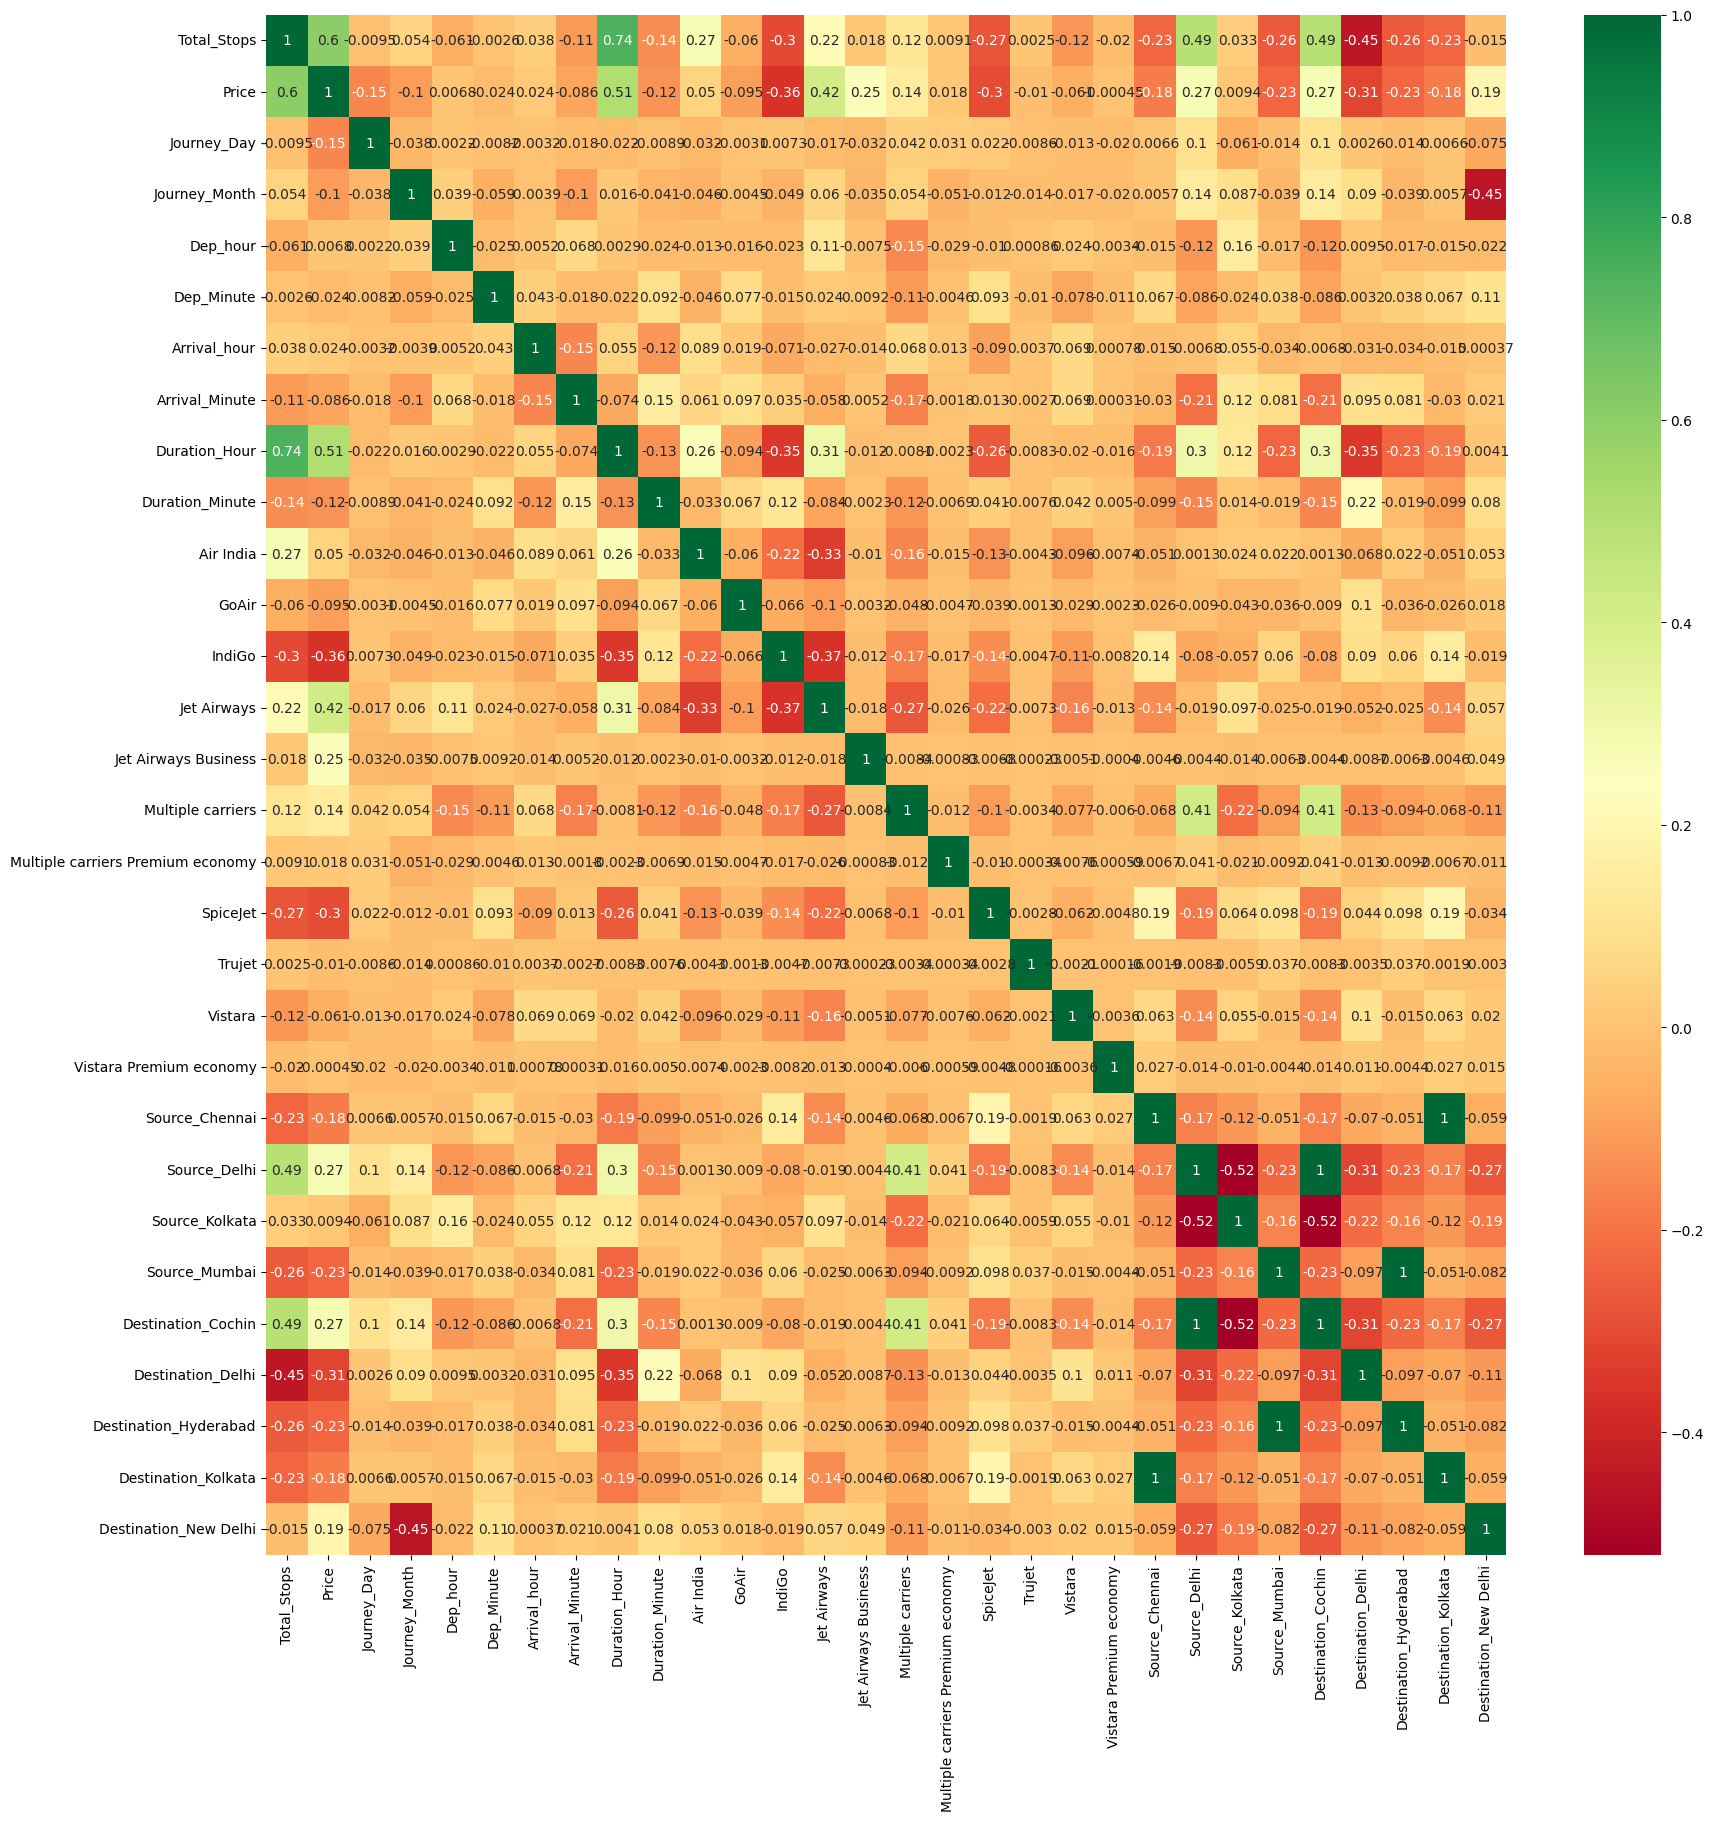

In [54]:
plt.figure(figsize=(20,20))
sns.heatmap(flight.corr() , annot=True , cmap = 'RdYlGn')
plt.show()

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(X,y)

ExtraTreesRegressor()

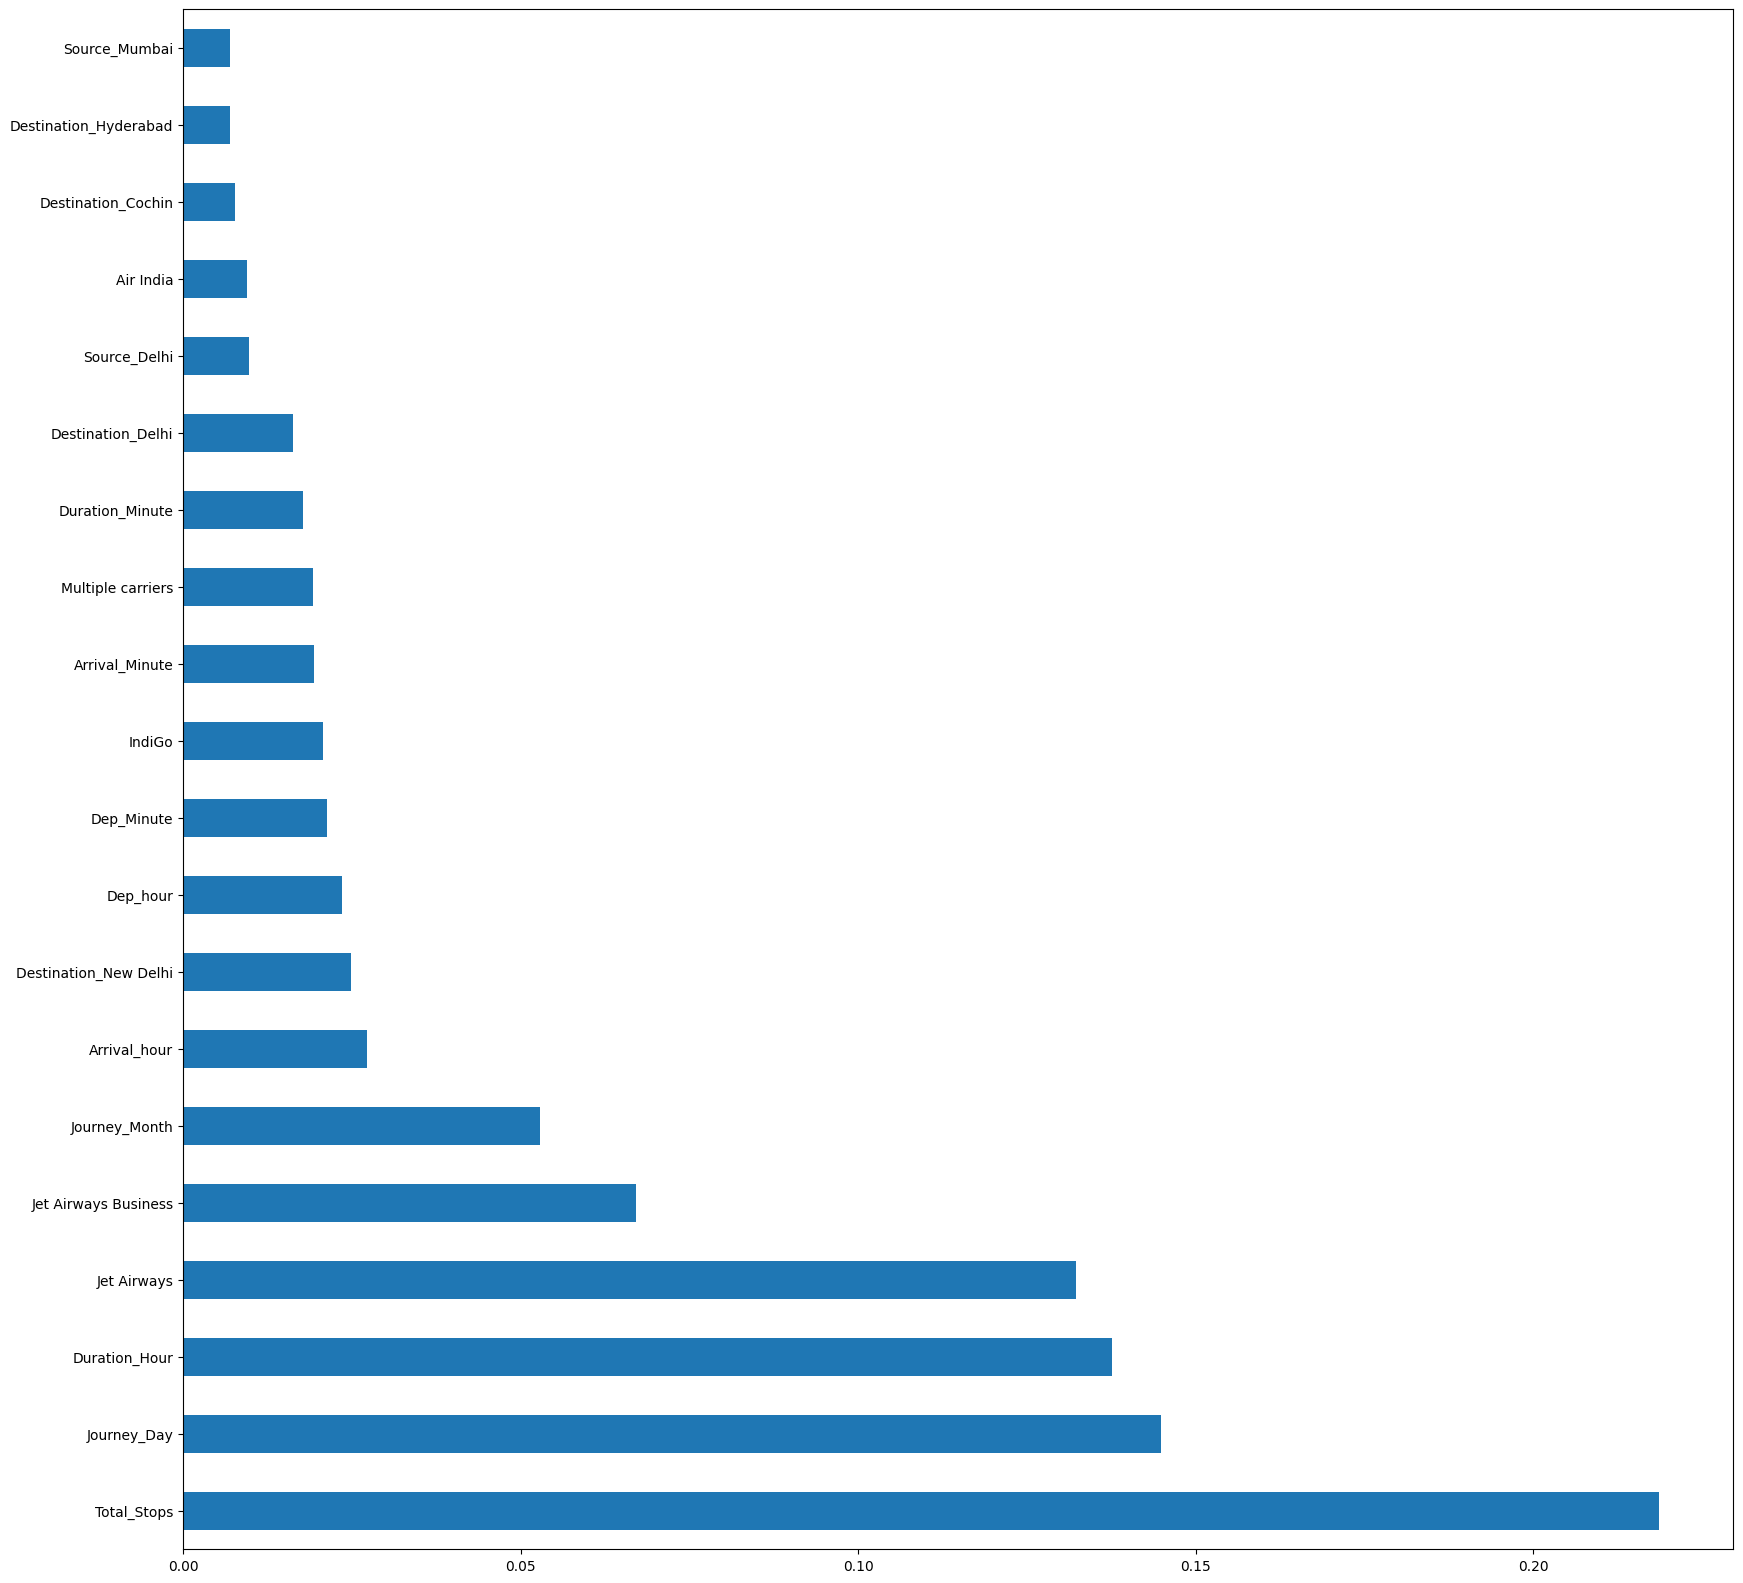

In [56]:
plt.figure(figsize=(20,20))

feat = pd.Series(etr.feature_importances_ , index=X.columns)
feat.nlargest(20).plot(kind='barh')

plt.show()

## Fit model using Random Forest

In [57]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=51)

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)

RandomForestRegressor()

In [59]:
pred = rfr.predict(X_test)

In [60]:
rfr.score(X_train , y_train)

0.9527313460984798

In [61]:
rfr.score(X_test , y_test)

0.8280089092399187

C:\Users\Anil\AppData\Local\Temp\ipykernel_10268\2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<AxesSubplot: xlabel='Price', ylabel='Density'>

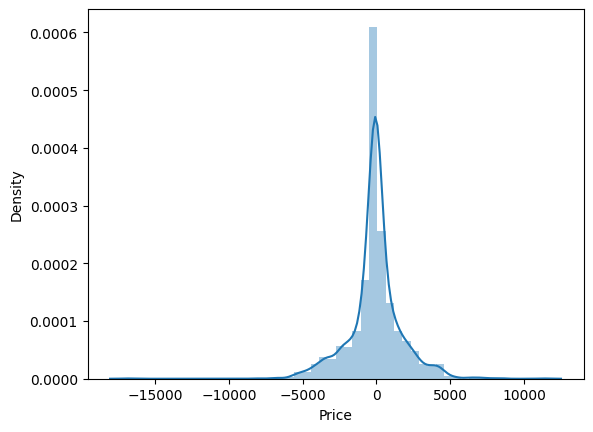

In [62]:
sns.distplot(y_test - pred)

Text(0, 0.5, 'pred')

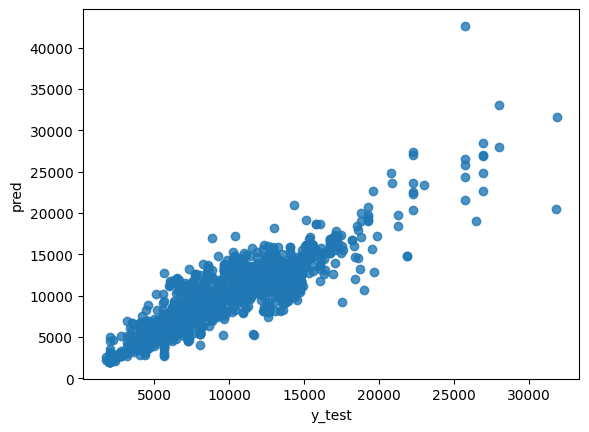

In [63]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1136.59660620407
MSE: 3224195.8263292047
RMSE: 1795.6045851827191


In [65]:
metrics.r2_score(y_test,pred)

0.8280089092399187

## Hyperprameter Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(100,2000,10)]
max_depth = [int(x) for x in np.linspace(100,2000,10)]
min_samples_split=[2,4,6,8,10,12,14]
min_samples_leaf=[1,3,5,7,8,10]
max_features=['sqrt','log2','auto',None]

random_search = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'max_features' : max_features,
    
}

random_search


{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'max_depth': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000],
 'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
 'min_samples_leaf': [1, 3, 5, 7, 8, 10],
 'max_features': ['sqrt', 'log2', 'auto', None]}

In [69]:
rfr_random = RandomizedSearchCV(estimator=rfr , param_distributions=random_search , n_iter=10 , cv=5 , verbose=2 , random_state=51 , n_jobs=1)

In [70]:
rfr_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.0s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.1s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.0s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.1s
[CV] END max_depth=2000, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.0s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   8.9s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=1155; total time=   8.8s
[CV] END max_depth=311, max_features=log2, min_samples_leaf=1, min_samples_split

c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  21.3s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  21.4s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  21.4s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  21.2s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2000, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=2000; total time=  21.8s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.1s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.2s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.0s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   6.9s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=1788; total time=   7.0s
[CV] END max_depth=522, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_depth=522, max_features=None, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END max_dept

c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  18.2s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  18.5s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  25.7s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  18.1s


c:\Users\Anil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1577, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=1577; total time=  18.3s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  21.4s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  21.5s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  21.5s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  21.2s
[CV] END max_depth=1788, max_features=None, min_samples_leaf=5, min_samples_split=14, n_estimators=1788; total time=  21.2s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1366; total time=   4.8s
[CV] END max_depth=1577, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1366; total time=   4.9s
[CV] END 

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [100, 311, 522, 733, 944,
                                                      1155, 1366, 1577, 1788,
                                                      2000],
                                        'max_features': ['sqrt', 'log2', 'auto',
                                                         None],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=51, verbose=2)

In [71]:
rfr_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': 522}

In [72]:
prediction = rfr_random.predict(X_test)

C:\Users\Anil\AppData\Local\Temp\ipykernel_10268\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


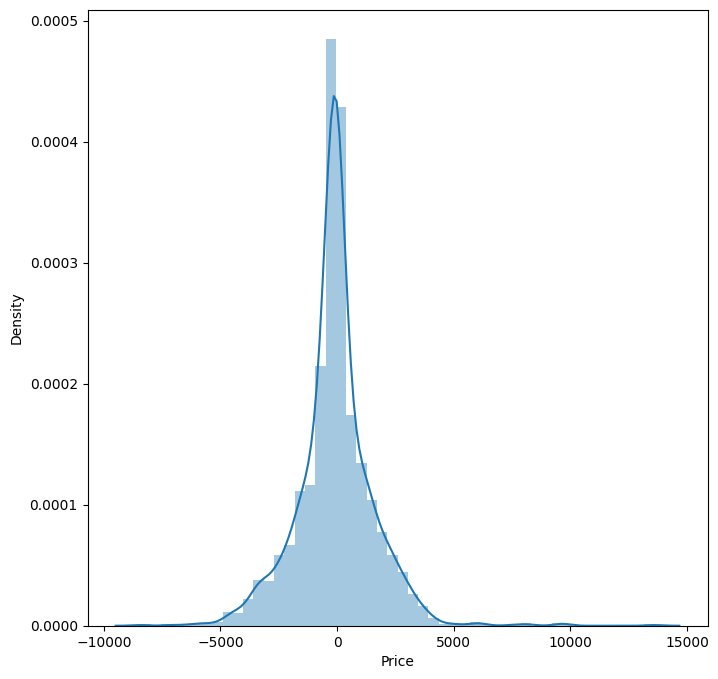

In [73]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

Text(0, 0.5, 'pred')

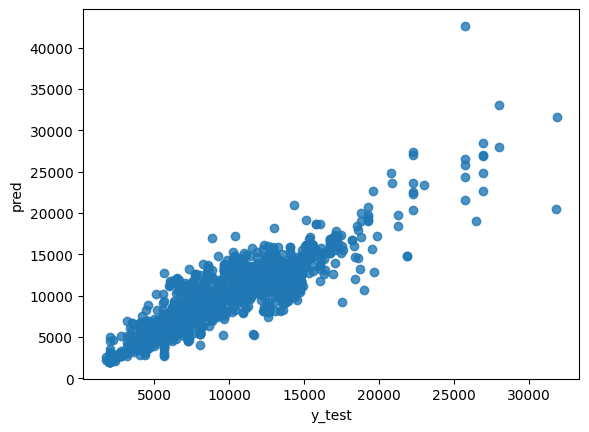

In [74]:
plt.scatter(y_test , pred , alpha=0.8)
plt.xlabel('y_test')
plt.ylabel('pred')

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1088.4383040468492
MSE: 2656341.4147950066
RMSE: 1629.8286458382693


In [76]:
metrics.r2_score(y_test,prediction)

0.8583004625119434

## Save the model

In [77]:
import pickle
file = open('Flight-Fare-Prediction.pkl','wb')
pickle.dump(rfr_random,file)

In [78]:
model = open('Flight-Fare-Prediction.pkl','rb')
mod = pickle.load(model)

In [79]:
predicted_data = mod.predict(X_test)

In [80]:
metrics.r2_score(y_test,predicted_data)

0.8583004625119434